# Exploratory Data Analysis

## Structure Analysis

In [2]:
import pandas as pd
#edu = pd.read_csv(r"C:\D\personal\Development\360\02- EDA\Datasets_EDA (1)\education.csv")
edu = pd.read_csv("C:/D/personal/Development/360/02- EDA/Datasets_EDA (1)/education.csv")

In [3]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   datasrno  773 non-null    int64
 1   workex    773 non-null    int64
 2   gmat      773 non-null    int64
dtypes: int64(3)
memory usage: 18.2 KB


In [4]:
edu.dtypes

datasrno    int64
workex      int64
gmat        int64
dtype: object

In [5]:
edu.head()

,datasrno,workex,gmat
0,1,21,720
1,2,107,640
2,3,57,740
3,4,99,690
4,5,208,710


In [6]:
edu.tail()

,datasrno,workex,gmat
768,769,88,620
769,770,132,670
770,771,28,610
771,772,10,610
772,773,52,620


In [74]:
edu.shape

(773, 3)

<AxesSubplot:xlabel='value', ylabel='variable'>

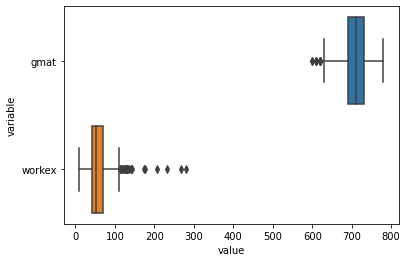

In [41]:
import seaborn as sns
#sns.boxplot(data=edu)
#sns.boxplot(data=[edu["gmat"],edu["workex"]] ,orient="h", palette="pastel")
#sns.boxplot(data=edu, orient="h", palette="pastel")

df = pd.DataFrame(data=edu, columns=["gmat", "workex"])
sns.boxplot(x="value", y="variable", data=pd.melt(df))

## Moments

In [135]:
edu.describe()

,datasrno,workex,gmat
count,773.00000,773.00000,773.000000
mean,387.00000,57.50194,711.164295
std,223.29017,27.38682,29.339714
min,1.00000,9.00000,600.000000
25%,194.00000,41.00000,690.000000
50%,387.00000,52.00000,710.000000
75%,580.00000,69.00000,730.000000
max,773.00000,279.00000,780.000000


### Measures of Central Tendency / First moment business decision

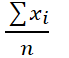

In [46]:
# Mean
edu.gmat.mean() ,edu.workex.mean()

(711.1642949547219, 57.501940491591206)

In [47]:
# Median
edu.gmat.median() ,edu.workex.median()

(710.0, 52.0)

In [48]:
# Mode
edu.gmat.mode() ,edu.workex.mode()

(0    710
 dtype: int64,
 0    45
 dtype: int64)

### Measures of Dispersion / Second moment business decision

In [49]:
#Variance
edu.workex.var(),edu.gmat.var()

(750.0378848306511, 860.8188271253243)

In [50]:
#Standard Deviation
edu.workex.std(),edu.gmat.std()

(27.386819545734973, 29.339714162297565)

In [52]:
#Range
rangeworkex = max(edu.workex) - min(edu.workex) # range
rangegmat = max(edu.gmat) - min(edu.gmat) # range
rangeworkex,rangegmat

(270, 180)

In [55]:
#IQR
iqr_workex = edu['workex'].quantile(0.75) - edu['workex'].quantile(0.25) # IQR
iqr_gmat = edu['gmat'].quantile(0.75) - edu['gmat'].quantile(0.25) # IQR
iqr_workex,iqr_gmat

(28.0, 40.0)

### Skew /Third moment business decision

In [56]:
edu.workex.skew(),edu.gmat.skew()

(2.6085365678230614, -0.5954765248452923)

<b> Analysis: </b>  
<b>Karl Pearson's second coefficient of skewness </b>   
a) -0.5 to 0.5 - symmetrical  
b) -1 to -0.5  - negative skew  
c) 0.5 to 1 - positive skew  
d) lower than -1 or greater that 1 - extreme skew  


1) workex is extreme positive skew (2.6>1). See PDF below   
2) gmat is almost symmetrical with slight negative skew (-0.59<-0.5). See PDF below   

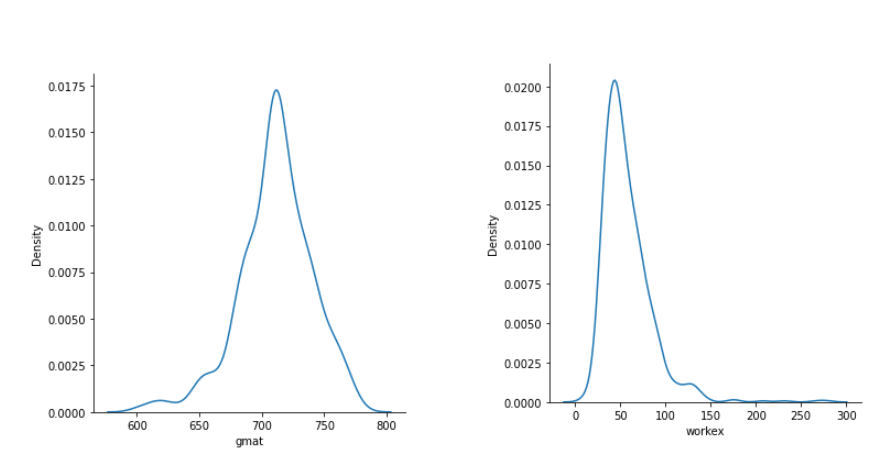

### Kurtosis / Fourth moment business decision

In [69]:
edu.workex.kurt(),edu.gmat.kurt()

(13.404731601273921, 1.167164158069025)

<b> Analysis: </b>  
<b>1) workex is letptokurtic (13.4>3). heavy tailed. </b>   
       -influenced by outliers.    
       -Accuracy of variance impacted    
       -Power of tests on means is low  
<b>2) gmat score is platykurtic (1.16 less than 3). </b>  
        -flat topped.thin tailed.  
        -less number of outliers  
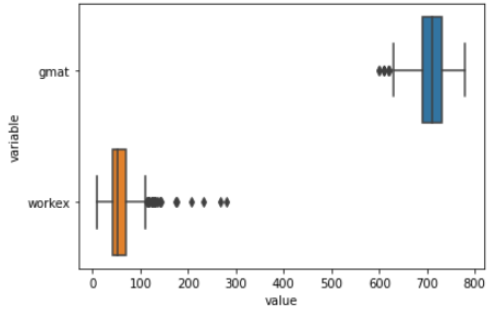

## Data Visualization

#### Probability Density function

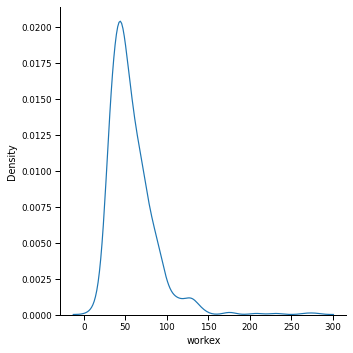

In [217]:
#Probability Density function
sns.displot(edu, x="workex", kind="kde")

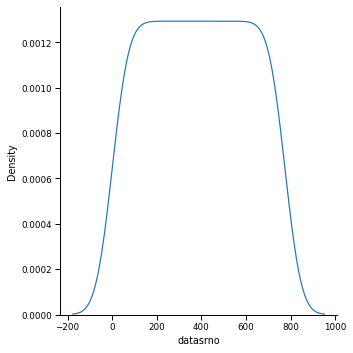

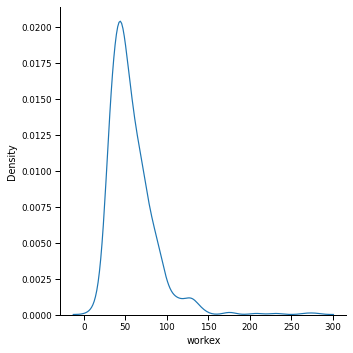

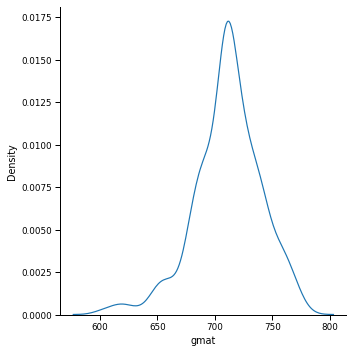

In [228]:
for col in edu.columns:
    #sns.displot(edu, x=col, kind="kde")
    sns.displot(edu[col], kind="kde")

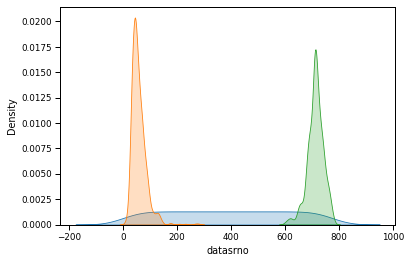

In [222]:
for col in edu.columns:
    sns.kdeplot(edu[col], shade= True)

#### Barchart

<BarContainer object of 773 artists>

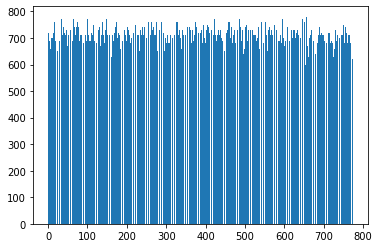

In [76]:
import matplotlib.pyplot as plt
# Barchart matplotlib
plt.bar(height = edu.gmat, x = np.arange(1, 774, 1)) # initializing the parameter

<AxesSubplot:ylabel='gmat'>

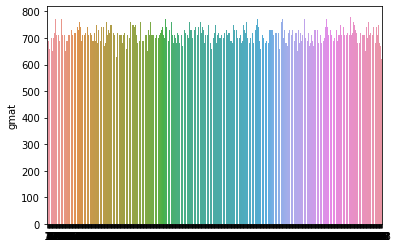

In [88]:
# Barchart seaborn
sns.barplot(x = np.arange(1, 774, 1), y= edu.gmat, data=edu)

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64
sex     cla

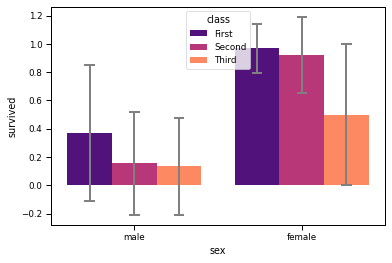

In [216]:
sns.set_context('paper')

# load dataset
titanic = sns.load_dataset('titanic')
print(titanic.head())

# create plot
sns.barplot(x = 'sex', y = 'survived', hue = 'class', data = titanic,
            palette = 'magma',
            order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

print(titanic.groupby(['sex', 'class']).mean()['survived'])
print(titanic.groupby(['sex', 'class']).std()['survived'])

plt.show()

#### Histogram

(array([  6.,   9.,  20.,  30.,  54., 143., 282., 143.,  67.,  19.]),
 array([600., 618., 636., 654., 672., 690., 708., 726., 744., 762., 780.]),
 <BarContainer object of 10 artists>)

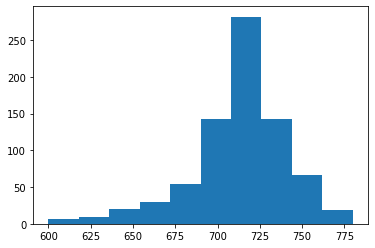

In [77]:
# Histogram matplotlib
plt.hist(edu.gmat) #histogram

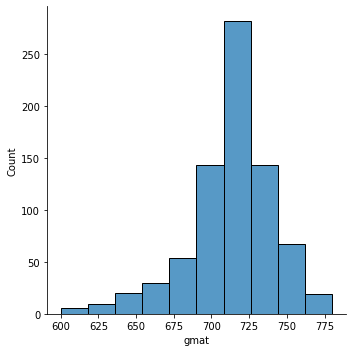

In [86]:
# Histogram seaborn
#sns.displot(edu, x="gmat", kind="hist")
sns.displot(edu, x="gmat", bins=10)

#### Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x1e0eeae6d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1e0eeaf54c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e0eeae69d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e0eeaf5be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e0eeaf5f70>],
 'means': []}

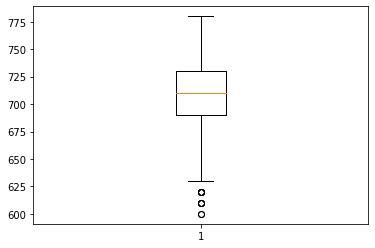

In [78]:
# Boxplot
plt.boxplot(edu.gmat) #boxplot

<AxesSubplot:>

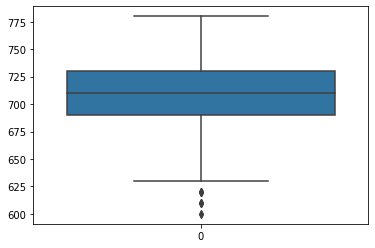

In [82]:
#sns.boxplot(data=[edu["gmat"],edu["workex"]] ,orient="v", palette="pastel")
sns.boxplot(data=[edu["gmat"]] ,orient="v")

#### Normal Quantile  Quantile Plot

* A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set.  
* Quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities  
* Q-Q plots are used to find the type of distribution for a random variable whether it be a Gaussian Distribution, Uniform         Distribution, Exponential Distribution or even Pareto Distribution

In [ ]:
#>>> # example 3
#>>> pplot = sm.ProbPlot(res, stats.t, distargs=(4,), loc=3, scale=10)
#>>> fig = pplot.qqplot()
#>>> h = plt.title("Ex. 3 - qqplot - resids vs quantiles of t-dist")
#>>> plt.show()

In [657]:
# Normal Quantile-Quantile Plot

import pandas as pd

# Read data into Python
education = pd.read_csv("C:/D/personal/Development/360/02- EDA/Datasets_EDA (1)/education.csv")

((array([-3.12260341, -2.85151707, -2.69984322, -2.59267337, -2.50893963,
         -2.43979696, -2.38066073, -2.32883665, -2.28260202, -2.24078627,
         -2.20255648, -2.16729818, -2.13454461, -2.1039326 , -2.07517382,
         -2.04803542, -2.02232653, -1.99788867, -1.97458879, -1.95231403,
         -1.93096781, -1.91046682, -1.89073868, -1.8717201 , -1.85335538,
         -1.83559526, -1.81839593, -1.80171828, -1.78552721, -1.76979112,
         -1.75448146, -1.73957231, -1.7250401 , -1.71086332, -1.69702228,
         -1.68349892, -1.6702766 , -1.65734002, -1.644675  , -1.63226842,
         -1.62010812, -1.60818277, -1.59648185, -1.5849955 , -1.57371454,
         -1.56263038, -1.55173494, -1.54102065, -1.5304804 , -1.52010749,
         -1.50989561, -1.4998388 , -1.48993143, -1.48016819, -1.47054404,
         -1.4610542 , -1.45169414, -1.44245956, -1.43334639, -1.42435072,
         -1.41546885, -1.40669727, -1.39803261, -1.38947165, -1.38101133,
         -1.37264872, -1.36438101, -1.

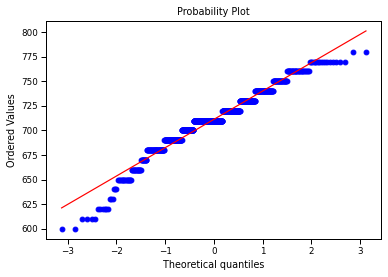

In [658]:
import scipy.stats as stats
import pylab
# Checking Whether data is normally distributed
stats.probplot(education.gmat, dist="norm", plot=pylab)

((array([-3.12260341, -2.85151707, -2.69984322, -2.59267337, -2.50893963,
         -2.43979696, -2.38066073, -2.32883665, -2.28260202, -2.24078627,
         -2.20255648, -2.16729818, -2.13454461, -2.1039326 , -2.07517382,
         -2.04803542, -2.02232653, -1.99788867, -1.97458879, -1.95231403,
         -1.93096781, -1.91046682, -1.89073868, -1.8717201 , -1.85335538,
         -1.83559526, -1.81839593, -1.80171828, -1.78552721, -1.76979112,
         -1.75448146, -1.73957231, -1.7250401 , -1.71086332, -1.69702228,
         -1.68349892, -1.6702766 , -1.65734002, -1.644675  , -1.63226842,
         -1.62010812, -1.60818277, -1.59648185, -1.5849955 , -1.57371454,
         -1.56263038, -1.55173494, -1.54102065, -1.5304804 , -1.52010749,
         -1.50989561, -1.4998388 , -1.48993143, -1.48016819, -1.47054404,
         -1.4610542 , -1.45169414, -1.44245956, -1.43334639, -1.42435072,
         -1.41546885, -1.40669727, -1.39803261, -1.38947165, -1.38101133,
         -1.37264872, -1.36438101, -1.

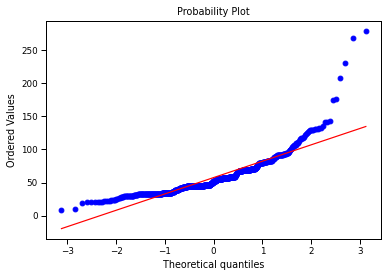

In [659]:
#comparing quantiles of education.workex with normal quantiles
stats.probplot(education.workex, dist="norm", plot=pylab)

observe that education.workex is not normally distributed

#### Tranform to normal distribution

((array([-3.12260341, -2.85151707, -2.69984322, -2.59267337, -2.50893963,
         -2.43979696, -2.38066073, -2.32883665, -2.28260202, -2.24078627,
         -2.20255648, -2.16729818, -2.13454461, -2.1039326 , -2.07517382,
         -2.04803542, -2.02232653, -1.99788867, -1.97458879, -1.95231403,
         -1.93096781, -1.91046682, -1.89073868, -1.8717201 , -1.85335538,
         -1.83559526, -1.81839593, -1.80171828, -1.78552721, -1.76979112,
         -1.75448146, -1.73957231, -1.7250401 , -1.71086332, -1.69702228,
         -1.68349892, -1.6702766 , -1.65734002, -1.644675  , -1.63226842,
         -1.62010812, -1.60818277, -1.59648185, -1.5849955 , -1.57371454,
         -1.56263038, -1.55173494, -1.54102065, -1.5304804 , -1.52010749,
         -1.50989561, -1.4998388 , -1.48993143, -1.48016819, -1.47054404,
         -1.4610542 , -1.45169414, -1.44245956, -1.43334639, -1.42435072,
         -1.41546885, -1.40669727, -1.39803261, -1.38947165, -1.38101133,
         -1.37264872, -1.36438101, -1.

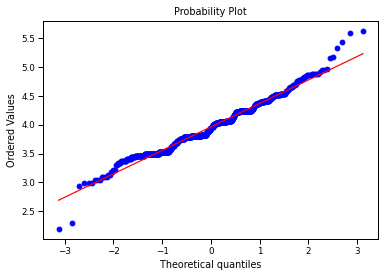

In [660]:
import numpy as np

# Transformation to make workex variable normal
stats.probplot(np.log(education.workex), dist="norm", plot=pylab)

## Data Preprocessing

It is the process of cleaning, structuring and enriching raw data into desired format for better decision making

### Zero Variance/Static columns

Two approaches:
1) Columns with same value for all observations are not useful as predictors.a zero variance column will always have exactly one    distinct value. get columns with one unique value.  
2) If the variance is low or close to zero, then a feature is approximately constant and will not improve the performance of the    model. These zero variance predictors can be removed.  

**Feature selection** techniques prune away nonuseful features in order to reduce the complexity of the resulting model. The end goal is a parsimonious model that is quicker to compute, with little or no degradation in predictive accuracy.

#### nunique

1) Columns with same value for all observations are not useful as predictors.a zero variance column will always have exactly one    distinct value. get columns with one unique value. 

In [333]:
#load data
oil_data = pd.read_csv("C:/D/personal/Development/360/02- EDA/Datasets_EDA (1)/oil-spill.csv")

In [334]:
oil_data.shape

(937, 50)

In [335]:
oil_data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A41,A42,A43,A44,A45,A46,A47,A48,A49,A50
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [377]:
#oil_data.nunique(dropna=False)==1 #Count of unique values including NaN
oil_data.nunique().sort_values()

A50      2
A46      2
A37      3
A33      4
A26      8
A22      9
A39      9
A27      9
A25      9
A40      9
A32     42
A34     45
A15     53
A20     53
A10     57
A12     59
A21     68
A13     73
A16     91
A24     92
A31    107
A14    107
A36    110
A35    141
A48    169
A19    170
A5     179
A42    220
A1     238
A49    286
A2     297
A28    308
A6     375
A41    388
A30    392
A29    447
A45    499
A9     561
A11    577
A8     618
A43    644
A44    649
A38    758
A18    810
A7     820
A17    893
A3     927
A4     933
A47    937
dtype: int64

In [361]:
#get column names where unique count is 1 ( takes pandas series as input)
cols = oil_data.columns[oil_data.nunique()==1]

In [362]:
cols

Index(['A23'], dtype='object')

In [371]:
oil_data.drop(cols, axis=1, inplace=True)

In [387]:
oil_data.A50.unique()

array([1, 0], dtype=int64)

#### Variance

If the variance is low or close to zero, then a feature is approximately constant and will not improve the performance of the    model. These zero variance predictors can be removed.

In [396]:
oil_data1 = pd.read_csv("C:/D/personal/Development/360/02- EDA/Datasets_EDA (1)/oil-spill.csv")

In [400]:
oil_data1.var().sort_values().head(10)

A23    0.000000
A37    0.000028
A33    0.002400
A20    0.005687
A15    0.006880
A12    0.007767
A10    0.008157
A21    0.011102
A13    0.014735
A50    0.041887
dtype: float64

In [399]:
cols = oil_data1.columns[oil_data1.var()==0]

In [401]:
oil_data1.drop(cols, axis=1, inplace=True)

In [402]:
oil_data1.var().sort_values().head()

A37    0.000028
A33    0.002400
A20    0.005687
A15    0.006880
A12    0.007767
dtype: float64

### Type casting

In [95]:
#load data
data = pd.read_csv("C:/D/personal/Development/360/02- EDA/Datasets_EDA (1)/ethnic diversity.csv")

In [96]:
data.dtypes

Employee_Name        object
EmpID                 int64
Position             object
State                object
Zip                   int64
Sex                  object
MaritalDesc          object
CitizenDesc          object
EmploymentStatus     object
Department           object
Salaries            float64
age                   int64
Race                 object
dtype: object

In [97]:
data.head()

,Employee_Name,EmpID,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race
0,"Brown, Mia",1103024456,Accountant I,MA,1450,F,Married,US Citizen,Active,Admin Offices,674.28,28,Black or African American
1,"LaRotonda, William",1106026572,Accountant I,MA,1460,M,Divorced,US Citizen,Active,Admin Offices,674.28,50,Black or African American
2,"Steans, Tyrone",1302053333,Accountant I,MA,2703,M,Single,US Citizen,Active,Admin Offices,674.28,43,White
3,"Howard, Estelle",1211050782,Administrative Assistant,MA,2170,F,Married,US Citizen,Terminated for Cause,Admin Offices,47822.00,44,White
4,"Singh, Nan",1307059817,Administrative Assistant,MA,2330,F,Single,US Citizen,Active,Admin Offices,61089.35,33,White


In [100]:
#change Salaries dtype  to int64
data.Salaries = data.Salaries.astype('int64')
#truncates - does not round off

In [101]:
#check dataypes
data.dtypes

Employee_Name       object
EmpID                int64
Position            object
State               object
Zip                  int64
Sex                 object
MaritalDesc         object
CitizenDesc         object
EmploymentStatus    object
Department          object
Salaries             int64
age                  int64
Race                object
dtype: object

In [102]:
data.head()

,Employee_Name,EmpID,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race
0,"Brown, Mia",1103024456,Accountant I,MA,1450,F,Married,US Citizen,Active,Admin Offices,674,28,Black or African American
1,"LaRotonda, William",1106026572,Accountant I,MA,1460,M,Divorced,US Citizen,Active,Admin Offices,674,50,Black or African American
2,"Steans, Tyrone",1302053333,Accountant I,MA,2703,M,Single,US Citizen,Active,Admin Offices,674,43,White
3,"Howard, Estelle",1211050782,Administrative Assistant,MA,2170,F,Married,US Citizen,Terminated for Cause,Admin Offices,47822,44,White
4,"Singh, Nan",1307059817,Administrative Assistant,MA,2330,F,Single,US Citizen,Active,Admin Offices,61089,33,White


In [103]:
#change age dtype  to float32
data.age = data.age.astype('float32')

In [104]:
#check dataypes
data.dtypes

Employee_Name        object
EmpID                 int64
Position             object
State                object
Zip                   int64
Sex                  object
MaritalDesc          object
CitizenDesc          object
EmploymentStatus     object
Department           object
Salaries              int64
age                 float32
Race                 object
dtype: object

In [105]:
data.head()

,Employee_Name,EmpID,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race
0,"Brown, Mia",1103024456,Accountant I,MA,1450,F,Married,US Citizen,Active,Admin Offices,674,28.0,Black or African American
1,"LaRotonda, William",1106026572,Accountant I,MA,1460,M,Divorced,US Citizen,Active,Admin Offices,674,50.0,Black or African American
2,"Steans, Tyrone",1302053333,Accountant I,MA,2703,M,Single,US Citizen,Active,Admin Offices,674,43.0,White
3,"Howard, Estelle",1211050782,Administrative Assistant,MA,2170,F,Married,US Citizen,Terminated for Cause,Admin Offices,47822,44.0,White
4,"Singh, Nan",1307059817,Administrative Assistant,MA,2330,F,Single,US Citizen,Active,Admin Offices,61089,33.0,White


### Deduplication

#### Identify duplicates

In [403]:
#load data
data = pd.read_csv("C:/D/personal/Development/360/02- EDA/Datasets_EDA (1)/mtcars_dup.csv")

In [404]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23     True
24    False
25    False
26    False
27     True
28    False
29    False
30    False
31    False
dtype: bool

In [405]:
dup = data.duplicated()

In [206]:
type(dup)

pandas.core.series.Series

In [406]:
#total duplicated records
sum(dup)

3

In [407]:
#display duplicated records
data[data.duplicated()]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
17,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1
23,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
27,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4


In [408]:
data.shape

(32, 11)

#### Removing Duplicates

In [409]:
#drop duplicates and copy to another dataframe
data1 = data.drop_duplicates()

In [410]:
#check total records in new dataframe
data1.shape

(29, 11)

In [411]:
#check total records in original dataframe
data.shape

(32, 11)

In [412]:
#inplace - drop duplicates in original dataframe, keep first record
data.drop_duplicates(keep='first',inplace= True)

In [413]:
#check total records in original dataframe
data.shape

(29, 11)

In [414]:
#cross verify if any duplicates remain
data.duplicated().any()

False

### Outlier Treatment

<b>1) Remove</b>    
      Trimming outliers. On the down side, these values, may contain useful information for other variables included in the           dataset.(np.where)  
<b>2) Replace</b>    
       a) np.where  
       b) Winsorization  
<b>3) Discretize</b>    
        Discretization  is the transformation of continuous variables into discrete variables.  
        It involves assigning the variable values into defined groups. The outlier is binned with other values hence the impact           is diluted.

#### Remove

In [118]:
#load data
div = pd.read_csv("C:/D/personal/Development/360/02- EDA/Datasets_EDA (1)/ethnic diversity.csv")

<AxesSubplot:>

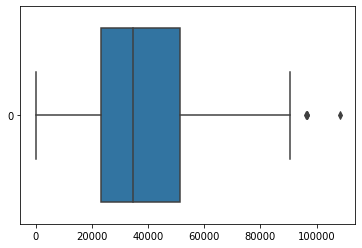

In [164]:
# let's find outliers in Salaries (boxplot)
sns.boxplot(data = div.Salaries,orient="h")

Outliers in Salary. positive skew

<AxesSubplot:>

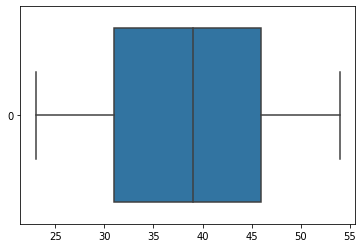

In [165]:
# let's find outliers in Age (boxplot)
sns.boxplot(data = div.age,orient="h")

No Outliers in age

In [123]:
# Detection of outliers (find limits for salary based on IQR)
IQR = div['Salaries'].quantile(0.75) - div['Salaries'].quantile(0.25)
lower_limit = div['Salaries'].quantile(0.25) - (IQR * 1.5)
upper_limit = div['Salaries'].quantile(0.75) + (IQR * 1.5)
lower_limit,upper_limit

(-19446.967499999995, 93992.8125)

In [166]:
#since negative salaries are not valid lets trim lower_limit to zero (zero-coding)
lower_limit = 0

In [167]:
lower_limit,upper_limit

(0, 93992.8125)

In [168]:
# Trimming Technique
# get the outliers in a boolean series
outliers_div = np.where(div['Salaries'] > upper_limit, True, np.where(df['Salaries'] < lower_limit, True, False))

Syntax :numpy.where(condition[, x, y])
Parameters:
condition : When True, yield x, otherwise yield y.

In [170]:
#total outliers in series
sum(outliers_div)

4

In [171]:
#display series
outliers_div

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [172]:
div_trimmed = div.loc[~(outliers_div), ]                #passing numpy.ndarray series to loc

In [ ]:
#loc
# 1) df.loc[4, :]                                       #single label  
# 2) df.loc[[3,8,5] , ['State','Position']]             #list of labels
# 3) df.loc[2:4, 'EmpID':'Salary']                      #slice object  
# 4) df.loc[df.MaritalDesc=='Single', :]                #boolean series or numpy.ndarray  
# 5) df.loc[lambda df: df.MaritalDesc == 'Single', :]   #function 

In [ ]:
#iloc
# 1) df.iloc[4, :]                                      #single label  
# 2) df.iloc[[3,8,5] , [1,0]]                           #list of labels
# 3) df.iloc[2:5, 0:4]                                  #slice object  
# 4) df.iloc[:, :].query("MaritalDesc=='Single'")       #query  
# 5) df.iloc[lambda x: x.index % 2 == 0]                #function 

In [173]:
#verify the shape of original and trimmed dataframe
div.shape, div_trimmed.shape

((310, 13), (306, 13))

<AxesSubplot:>

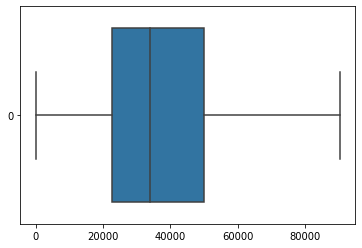

In [174]:
# boxplot - without outliers in Salaries
sns.boxplot(data = div_trimmed.Salaries,orient="h")

#### Replace

**Top-coding** - outlier is capped at a certain maximum value and therefore looks like many other observations, it is not uniquely identifiable any more.   
**Bottom-coding** is analogous, but on the left side of the distribution. All values below a certain threshold, are capped at that threshold.   
**Zero-coding** If the threshold is zero, then it is known as zero-coding  

You can choose to define your outlier threshold based on what works. two options among many are given below:

**option1** You can define an outlier as any point that is outside the **3σ** interval (usually for gaussian), which should encompass 99.7% of your data points in a gaussian distribution. In this case, you'd expect that around 0.3% of your data points would be outliers  

**option2** For any other distribution you can define any data point beyond 1.5 times IQR from Q1 and Q3 as outlier which would be **2.7σ** interval.you'd expect that around 0.7% of your data points would be outliers.

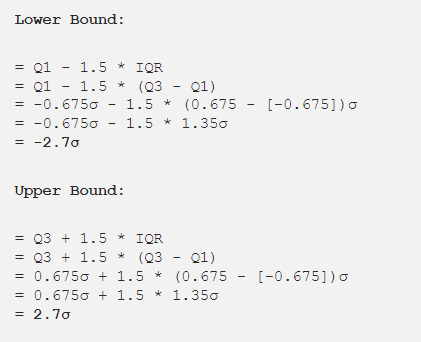

In [175]:
# Now let's replace the outliers by the maximum and minimum limit to new column (pd.DataFrame= typecasting array to dataframe)
div['df_replaced'] = pd.DataFrame(np.where(div['Salaries'] > upper_limit, upper_limit, np.where(div['Salaries'] < lower_limit, lower_limit, div['Salaries'])))

<AxesSubplot:>

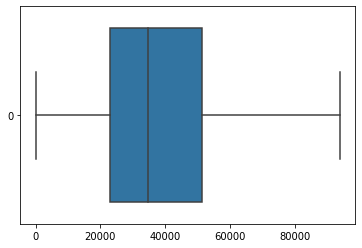

In [177]:
# check if ouliers exist in new column
sns.boxplot(data = div.df_replaced,orient="h")

##### Winsorization

In [181]:
from feature_engine.outliers import Winsorizer

In [182]:
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Salaries'])

In [183]:
df_t = winsor.fit_transform(df[['Salaries']])

In [185]:
div['df_t'] = df_t

<AxesSubplot:>

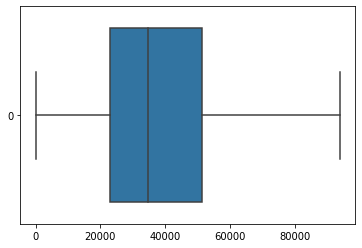

In [186]:
sns.boxplot(data = div.df_t,orient="h")

<AxesSubplot:>

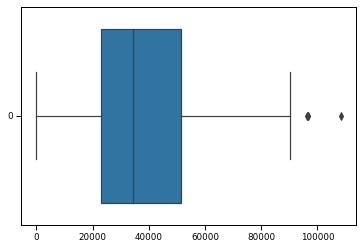

In [276]:
sns.boxplot(data = div.Salaries,orient="h")

In [278]:
#trim right only 
winsor1 = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='right', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Salaries'])

In [279]:
df_t1 = winsor1.fit_transform(df[['Salaries']])

In [280]:
div['df_t1'] = df_t1

<AxesSubplot:>

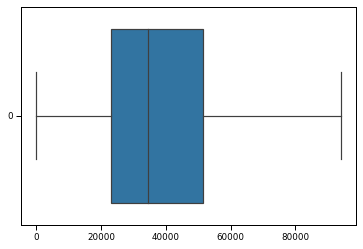

In [281]:
sns.boxplot(data = div.df_t1,orient="h")

### Discretization

* Converts continuous numerical data to categorical data

In [124]:
import pandas as pd
data = pd.read_csv("C:/D/personal/Development/360/02- EDA/Datasets_EDA (1)/ethnic diversity.csv")

In [125]:
data.head()

,Employee_Name,EmpID,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race
0,"Brown, Mia",1103024456,Accountant I,MA,1450,F,Married,US Citizen,Active,Admin Offices,674.28,28,Black or African American
1,"LaRotonda, William",1106026572,Accountant I,MA,1460,M,Divorced,US Citizen,Active,Admin Offices,674.28,50,Black or African American
2,"Steans, Tyrone",1302053333,Accountant I,MA,2703,M,Single,US Citizen,Active,Admin Offices,674.28,43,White
3,"Howard, Estelle",1211050782,Administrative Assistant,MA,2170,F,Married,US Citizen,Terminated for Cause,Admin Offices,47822.00,44,White
4,"Singh, Nan",1307059817,Administrative Assistant,MA,2330,F,Single,US Citizen,Active,Admin Offices,61089.35,33,White


In [126]:
data.describe()

,EmpID,Zip,Salaries,age
count,3.100000e+02,310.000000,310.000000,310.000000
mean,1.199745e+09,6569.732258,36670.102742,38.696774
std,1.829600e+08,16933.864054,21075.942369,9.258163
min,6.020003e+08,1013.000000,0.000000,23.000000
25%,1.101024e+09,1901.250000,23092.950000,31.000000
50%,1.203032e+09,2132.000000,34554.745000,39.000000
75%,1.378814e+09,2357.000000,51452.895000,46.000000
max,1.988300e+09,98052.000000,108304.000000,54.000000


In [128]:
data['Salaries_new'] = pd.cut(data['Salaries'], bins=[min(data.Salaries) - 1, 
                                                  data.Salaries.mean(), max(data.Salaries)], labels=["Low","High"])

In [129]:
data.head()

,Employee_Name,EmpID,Position,State,Zip,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race,Salaries_new
0,"Brown, Mia",1103024456,Accountant I,MA,1450,F,Married,US Citizen,Active,Admin Offices,674.28,28,Black or African American,Low
1,"LaRotonda, William",1106026572,Accountant I,MA,1460,M,Divorced,US Citizen,Active,Admin Offices,674.28,50,Black or African American,Low
2,"Steans, Tyrone",1302053333,Accountant I,MA,2703,M,Single,US Citizen,Active,Admin Offices,674.28,43,White,Low
3,"Howard, Estelle",1211050782,Administrative Assistant,MA,2170,F,Married,US Citizen,Terminated for Cause,Admin Offices,47822.00,44,White,High
4,"Singh, Nan",1307059817,Administrative Assistant,MA,2330,F,Single,US Citizen,Active,Admin Offices,61089.35,33,White,High


In [130]:
data.Salaries_new.value_counts()

Low     167
High    143
Name: Salaries_new, dtype: int64

In [131]:
data.shape

(310, 14)

### Missing Values Imputation

* Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a complete dataset that can then be then used for machine learning.  
* Mean/median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution)  




* **MCAR: Missing Completely at random :**
If the probability of being missing is the same for all cases, then the data are said to be missing completely at random (MCAR). This effectively implies that causes of the missing data are unrelated to the data.

* **MAR: Missing at Random:**
If the probability of being missing is the same only within groups defined by the observed data, then the data are missing at random (MAR). MAR is a much broader class than MCAR. For example, when placed on a soft surface, a weighing scale may produce more missing values than when placed on a hard surface.

* **MNAR: Missing Not at Random**
MNAR means that the probability of being missing varies for reasons that are unknown to us. For example, the weighing scale mechanism may wear out over time, producing more missing data as time progresses, but we may fail to note this.
MNAR is called “non-ignorable” because the missing data mechanism itself has to be modeled as you deal with the missing data. Strategies to handle MNAR are to find more data about the causes for the missingness, or to perform what-if analyses to see how sensitive the results are under various scenarios.


isnull() and isna() give the same output. isnull() is just an alias of the isna() method as shown in pandas source code.
You can use the pd.NaT, np.NaN or None to denote the missing values in the dataframe.

In [601]:
df = pd.read_csv('C:/D/personal/Development/360/02- EDA/Datasets_EDA (1)/modified ethnic.csv') # for doing modifications

In [522]:
df.isna()

,Position,State,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race
0,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,True
4,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
305,False,False,False,False,False,False,False,True,False,False
306,False,False,False,False,False,False,False,False,False,False
307,True,False,False,False,False,False,False,False,False,False
308,False,False,False,True,False,False,False,False,False,False


In [523]:
# check for count of NA'sin each column
df.isna().sum()

Position            43
State               35
Sex                 34
MaritalDesc         29
CitizenDesc         27
EmploymentStatus    32
Department          18
Salaries            32
age                 35
Race                25
dtype: int64

In [524]:
# Create an imputer object that fills 'Nan' values
# Mean and Median imputer are used for numeric data (Salaries)
# Mode is used for discrete data (ex: Position, Sex, MaritalDesc)

# for Mean, Median, Mode imputation we can use Simple Imputer or df.fillna()
from sklearn.impute import SimpleImputer

The imputation strategy for SimpleImputer.

* If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.  
* If “median”, then replace missing values using the median along each column. Can only be used with numeric data.  
* If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.  
* If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.  

#### Mean Imputer 

In [525]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [529]:
df["Salaries"] = pd.DataFrame(mean_imputer.fit_transform(df[["Salaries"]]))

In [530]:
df["Salaries"].isna().sum()

0

In [531]:
df.isna().sum()

Position            43
State               35
Sex                 34
MaritalDesc         29
CitizenDesc         27
EmploymentStatus    32
Department          18
Salaries             0
age                 35
Race                25
dtype: int64

#### Median Imputer 

In [532]:
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [533]:
df["age"].isna().sum()

35

In [534]:
df["age"] = pd.DataFrame(median_imputer.fit_transform(df[["age"]]))

In [535]:
df["age"].isna().sum()  # all 2 records replaced by median 

0

In [536]:
df.isna().sum()

Position            43
State               35
Sex                 34
MaritalDesc         29
CitizenDesc         27
EmploymentStatus    32
Department          18
Salaries             0
age                  0
Race                25
dtype: int64

#### Mode Imputer 

In [537]:
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [538]:
df["Sex"].isna().sum()

34

In [539]:
df["Sex"] = pd.DataFrame(mode_imputer.fit_transform(df[["Sex"]]))

In [540]:
df["MaritalDesc"] = pd.DataFrame(mode_imputer.fit_transform(df[["MaritalDesc"]]))

In [541]:
df.isnull().sum()  # all Sex, MaritalDesc records replaced by mode

Position            43
State               35
Sex                  0
MaritalDesc          0
CitizenDesc         27
EmploymentStatus    32
Department          18
Salaries             0
age                  0
Race                25
dtype: int64

#### Fillna

In [602]:
df.Race.value_counts()

White                               175
Black or African American            54
Asian                                32
Two or more races                    16
American Indian or Alaska Native      4
Hispanic                              4
Name: Race, dtype: int64

In [603]:
df.Race.isnull().sum()

25

In [604]:
#find the mode of categorical variable
race_mode= df['Race'].mode()[0] #[0] to get series as mode returns dataframe

In [605]:
race_mode

'White'

In [593]:
df.drop(['Race1'], axis=1)

,Position,State,Sex,MaritalDesc,CitizenDesc,EmploymentStatus,Department,Salaries,age,Race
0,Accountant I,NaN,F,Married,US Citizen,Active,Admin Offices,674.280000,39.0,Black or African American
1,Accountant I,MA,M,Divorced,US Citizen,Active,Admin Offices,674.280000,50.0,Black or African American
2,Accountant I,MA,M,Single,NaN,Active,Admin Offices,674.280000,43.0,White
3,Administrative Assistant,MA,F,Single,US Citizen,Terminated for Cause,Admin Offices,47822.000000,44.0,White
4,NaN,MA,F,Single,US Citizen,Active,Admin Offices,36725.396007,33.0,White
...,...,...,...,...,...,...,...,...,...,...
305,Sr. Network Engineer,CT,F,Married,US Citizen,Leave of Absence,IT/IS,36725.396007,38.0,White
306,Sr. Network Engineer,MA,M,Married,US Citizen,Leave of Absence,IT/IS,27603.000000,34.0,White
307,NaN,MA,M,Married,US Citizen,Future Start,IT/IS,27587.460000,24.0,Asian
308,Sr. Network Engineer,CT,M,Single,US Citizen,Active,IT/IS,12126.530000,31.0,White


In [607]:
#alternative method fillna
df['Race'].fillna(race_mode, inplace=True)

In [610]:
df.Race.isnull().sum()

0

#### Random Sampling

Pandas sample() is used to generate a sample random row or column from the function caller data frame. Returns a dataframe.   
**dataframe.sample(n, frac, replace, weights, random_state, axis)**

* data.sample(n = 1)  returns any 1 sample row
* data.sample(frac = 0.25) returns 25% sample rows from dataframe
* random_state = seed of random generator

In [628]:
df = pd.read_csv('C:/D/personal/Development/360/02- EDA/Datasets_EDA (1)/modified ethnic.csv') # for doing modifications

In [629]:
df.isnull().sum() 

Position            43
State               35
Sex                 34
MaritalDesc         29
CitizenDesc         27
EmploymentStatus    32
Department          18
Salaries            32
age                 35
Race                25
dtype: int64

In [630]:
# copy the age column
df['age_Random'] = df['age']

# get the count of missing values for age
missing_count = df['age'].isna().sum()

# drop all null valued rows and get a sample from remaining records (sample size = missing count)
random_sample = df['age'].dropna().sample(missing_count, random_state = 0)

#random_sample.index has indexes from original dataframe sample
#assign missing value indexes to random sample
random_sample.index = df[df['age'].isna()].index

#assign the random sample (with indexes) to rows where boolean series df['age'].isna() is true
df.loc[df['age'].isna(), 'age_Random'] = random_sample

In [631]:
df.isnull().sum()

Position            43
State               35
Sex                 34
MaritalDesc         29
CitizenDesc         27
EmploymentStatus    32
Department          18
Salaries            32
age                 35
Race                25
age_Random           0
dtype: int64

In [632]:
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df["age_median"] = pd.DataFrame(median_imputer.fit_transform(df[["age"]]))

In [633]:
df.isnull().sum()

Position            43
State               35
Sex                 34
MaritalDesc         29
CitizenDesc         27
EmploymentStatus    32
Department          18
Salaries            32
age                 35
Race                25
age_Random           0
age_median           0
dtype: int64

In [634]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df["age_mean"] = pd.DataFrame(median_imputer.fit_transform(df[["age"]]))

In [635]:
df.isnull().sum()

Position            43
State               35
Sex                 34
MaritalDesc         29
CitizenDesc         27
EmploymentStatus    32
Department          18
Salaries            32
age                 35
Race                25
age_Random           0
age_median           0
age_mean             0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

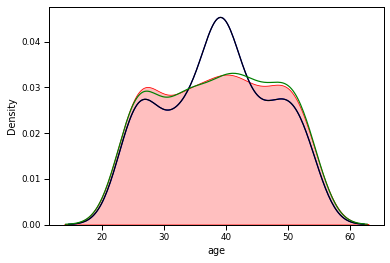

In [654]:
sns.kdeplot(df['age'], shade= True, color= 'red')
sns.kdeplot(df['age_median'], shade= False ,color = 'blue')
sns.kdeplot(df['age_mean'], shade= False, color = 'black')
sns.kdeplot(df['age_Random'], shade= False, color = 'green')

We can see that the random sampling imputation (green line) is closest to age distribution (red line)

### Encoding Categorical Variables

We need to convert categorical columns to numerical columns so that a machine learning algorithm can understand the input.   
Categorical encoding is a process of converting categories to numbers.  

**Target variable**    

**1) Label Encoding** : Each label is assigned a unique integer based on alphabetical ordering. Should be used only on target variable.

**Predictors** 

**2) One-Hot Encoding** When data is nominal. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature(Dummy Variable).It overcomes the above disadvantage.  
Disadvantages:   
 * **Multicollinearity** It occurs where there is a dependency between the independent features.Multicollinearity is a serious  issue in machine learning models like Linear Regression and Logistic Regression.to overcome this one of the dummy variables has to be dropped.Dummy coding removes the extra degree of freedom by using only k–1 features in the representation  
 * **Dimensionality curse** Hughes phenomenon states that with a fixed number of training samples, the average (expected) predictive power of a classifier or regressor first increases as the number of dimensions or features used is increased but beyond a certain dimensionality it starts deteriorating instead of improving steadily.

**3) Ordinal Encoding** When data is ordinal.

**4) Bag of Words** is popular for text or token counts

**Application**  
* We apply One-Hot Encoding when:  
The categorical feature is not ordinal 
The number of categorical features is less so one-hot encoding can be effectively applied  

* We apply Label Encoding when:  
The categorical feature is ordinal (like low,medium,high)  
The number of categories is quite large as one-hot encoding can lead to high memory consumption  

To Compress the features. There are two choices:  

* Feature hashing, popular with linear models  
  The idea of bin counting is deviously simple: rather than using the value of the categorical variable as the feature, instead   use the conditional probability of the target under that value. 
  
* Bin counting, popular with linear models as well as trees  
  


#### One Hot encoder

**One-Hot Encoding** When data is nominal. It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature(Dummy Variable).

Disadvantages:   
 * **Multicollinearity** It occurs where there is a dependency between the independent features.Multicollinearity is a serious  issue in machine learning models like Linear Regression and Logistic Regression.to overcome this one of the dummy variables has to be dropped.Dummy coding removes the extra degree of freedom by using only k–1 features in the representation(drop='first')  
 * **Dimensionality curse** Hughes phenomenon states that with a fixed number of training samples, the average (expected) predictive power of a classifier or regressor first increases as the number of dimensions or features used is increased but beyond a certain dimensionality it starts deteriorating instead of improving steadily.  
* To reduce the number of dimensions we group together the least frequent values and create another column.



In [766]:
cars = pd.read_csv("C:/D/personal/Development/360/02- EDA/Datasets_EDA (1)/cars.csv")

In [768]:
cars.sample(5)

,brand,km_driven,fuel,owner,selling_price
7384,Maruti,35000,Petrol,Second Owner,240000
6807,Ford,120000,Diesel,Second Owner,325000
6729,Maruti,56000,Diesel,Second Owner,425000
3744,Maruti,82000,Petrol,Third Owner,270000
2997,Maruti,175000,Diesel,Second Owner,170000


In [770]:
cars.brand.value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64

In [771]:
cars.brand.nunique()

32

In [772]:
cars.fuel.value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [773]:
cars.owner.value_counts()

First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64

In [774]:
# one hot encoding using pandas function. generally not used in projects as the encoding is not retained every run.
pd.get_dummies(cars,columns=['fuel','owner'])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,0,1,0,0,1,0,0,0,0
1,Skoda,120000,370000,0,1,0,0,0,0,1,0,0
2,Honda,140000,158000,0,0,0,1,0,0,0,0,1
3,Hyundai,127000,225000,0,1,0,0,1,0,0,0,0
4,Maruti,120000,130000,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,0,1,1,0,0,0,0
8124,Hyundai,119000,135000,0,1,0,0,0,1,0,0,0
8125,Maruti,120000,382000,0,1,0,0,1,0,0,0,0
8126,Tata,25000,290000,0,1,0,0,1,0,0,0,0


In [775]:
# k-1 one hot encoding using (to solve multicollinearity problem)
pd.get_dummies(cars,columns=['fuel','owner'],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,1,0,0,0,0,0,0
1,Skoda,120000,370000,1,0,0,0,1,0,0
2,Honda,140000,158000,0,0,1,0,0,0,1
3,Hyundai,127000,225000,1,0,0,0,0,0,0
4,Maruti,120000,130000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,0,0,1,0,0,0,0
8124,Hyundai,119000,135000,1,0,0,1,0,0,0
8125,Maruti,120000,382000,1,0,0,0,0,0,0
8126,Tata,25000,290000,1,0,0,0,0,0,0


In [779]:
# one hot encoding using sklearn
X_train,X_test,y_train,y_test = train_test_split(cars.iloc[:,0:4],cars.iloc[:,-1],test_size=0.2,random_state=5)

In [781]:
X_train.head()

,brand,km_driven,fuel,owner
111,Tata,100000,Diesel,First Owner
7818,Mahindra,200000,Diesel,Fourth & Above Owner
6183,Skoda,11000,Petrol,First Owner
6672,Tata,135000,Diesel,First Owner
529,Maruti,46000,Petrol,First Owner


In [782]:
X_test.head()

,brand,km_driven,fuel,owner
7746,Isuzu,56800,Diesel,First Owner
1752,Mahindra,54000,Diesel,First Owner
1904,Ford,90000,Petrol,Second Owner
2019,Maruti,40000,Petrol,First Owner
5269,Maruti,100000,Petrol,First Owner


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [821]:
#ohe = OneHotEncoder(drop='first')
ohe = OneHotEncoder(drop='first',sparse=True,dtype=np.int32) #to return np array & integer for encoded values

In [814]:
# we want to apply ohe on fuel and owner. 
#so first we split the columns fuel and owner 
#apply ohe and concatenate with the other columns
#column transformer overcomes this additional step. It transforms in a single step
# bypass ohe.fit_transform(X_train[['fuel','owner']]).toarray() since sparse= true

In [822]:
# fit and tranform with ohe and get the resultant columns (for 'fuel','owner') in an array X_train_new from X_train
X_train_new= ohe.fit_transform(X_train[['fuel','owner']]).toarray()

In [823]:
# get the two columns in an array X_test_new from X_test
X_test_new= ohe.transform(X_test[['fuel','owner']]).toarray()

In [824]:
X_train[['brand','km_driven']].values

array([['Tata', 100000],
       ['Mahindra', 200000],
       ['Skoda', 11000],
       ...,
       ['Maruti', 35000],
       ['Maruti', 120000],
       ['Maruti', 52000]], dtype=object)

In [825]:
#Stack them horizontally
np.hstack((X_train[['brand','km_driven']].values,X_train_new)).shape

(6502, 9)

In [826]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new))

array([['Tata', 100000, 1, ..., 0, 0, 0],
       ['Mahindra', 200000, 1, ..., 0, 0, 0],
       ['Skoda', 11000, 0, ..., 0, 0, 0],
       ...,
       ['Maruti', 35000, 1, ..., 0, 0, 0],
       ['Maruti', 120000, 0, ..., 1, 0, 0],
       ['Maruti', 52000, 1, ..., 0, 0, 0]], dtype=object)

##### OneHotEncoding with top categories

One way to deal with rare categories is through **back-off** , a simple technique that accumulates the counts of all   
rare categories in a special bin - back-off bin. If the count is greater than a certain threshold, then the category  
gets its own count statistics. Otherwise, we use the statistics from the back-off bin.  

In [828]:
cars.brand.nunique()

32

In [831]:
cars.brand.value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: brand, dtype: int64

Group together brands having less than 100 cars into a separate column (to reduce dimensionaly) before OHE

In [832]:
car_count = cars.brand.value_counts()

In [836]:
car_count[car_count<100].index

Index(['Nissan', 'Jaguar', 'Volvo', 'Datsun', 'Mercedes-Benz', 'Fiat', 'Audi',
       'Lexus', 'Jeep', 'Mitsubishi', 'Force', 'Land', 'Isuzu', 'Kia',
       'Ambassador', 'Daewoo', 'MG', 'Ashok', 'Opel', 'Peugeot'],
      dtype='object')

In [853]:
replace_col = car_count[car_count<100].index

In [856]:
cars['brand'].replace(replace_col,'Others').value_counts()

Maruti        2448
Hyundai       1415
Mahindra       772
Tata           734
Others         538
Toyota         488
Honda          467
Ford           397
Chevrolet      230
Renault        228
Volkswagen     186
BMW            120
Skoda          105
Name: brand, dtype: int64

In [857]:
pd.get_dummies(cars['brand'].replace(replace_col,'Others'))

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Others,Renault,Skoda,Tata,Toyota,Volkswagen
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0,0,0,0,1,0,0,0,0,0,0,0,0
8124,0,0,0,0,1,0,0,0,0,0,0,0,0
8125,0,0,0,0,0,0,1,0,0,0,0,0,0
8126,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
np.hstack((X_train[['brand','km_driven']].values,X_train_new))

#### Ordinal Encoder

Encode categorical features as an integer array.

The input to this transformer should be an array-like of integers or strings, denoting the values taken  
on by categorical (discrete) features. The features are converted to ordinal integers.   
This results in a single column of integers (0 to n_categories - 1) per feature.  

* before performing any column transformation you need to do a train test split  
* fit with train and transform both train and test

In [765]:
df1 = pd.read_csv("C:/D/personal/Development/360/02- EDA/Datasets_EDA (1)/customer.csv")

In [764]:
df1.head(3)

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No


In [732]:
df1.sample(10)

,age,gender,review,education,purchased
8,65,Female,Average,UG,No
4,16,Female,Average,UG,No
26,53,Female,Poor,PG,No
38,45,Female,Good,School,No
13,57,Female,Average,School,No
17,22,Female,Poor,UG,Yes
27,69,Female,Poor,PG,No
21,32,Male,Average,PG,No
43,27,Male,Poor,PG,No
7,60,Female,Poor,School,Yes


* review and education are ordinal data - apply ordinal encoder  
* gender is nominal data - apply one hot encoder  
* purchased is nominal target vaiable - label encoder  

In [733]:
#extract ordinal predictors and target variable
df1 = df1.iloc[:,2:]

In [734]:
df1.sample(10)

,review,education,purchased
1,Poor,UG,No
12,Poor,School,No
6,Good,School,No
3,Good,PG,No
48,Good,UG,Yes
38,Good,School,No
36,Good,UG,Yes
22,Poor,PG,Yes
9,Good,UG,Yes
29,Average,UG,Yes


* before performing any column transformation you need to do a train test split  
* fit with train and transform both train and test

In [737]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df1.iloc[:,0:2],df1.iloc[:,-1],test_size=0.2)

In [738]:
X_train.shape

(40, 2)

In [739]:
X_test.shape

(10, 2)

In [740]:
from sklearn.preprocessing import OrdinalEncoder

In [741]:
df1.review.unique()

array(['Average', 'Poor', 'Good'], dtype=object)

In [742]:
df1.education.unique()

array(['School', 'UG', 'PG'], dtype=object)

In [744]:
X_train.head(5)

,review,education
21,Average,PG
23,Good,School
31,Poor,School
19,Poor,PG
6,Good,School


In [745]:
X_test

,review,education
27,Poor,PG
44,Average,UG
45,Poor,PG
17,Poor,UG
35,Poor,School
16,Poor,UG
26,Poor,PG
41,Good,PG
15,Poor,UG
36,Good,UG


In [746]:
ord_enc = OrdinalEncoder(categories = [['Poor', 'Average', 'Good'],['School', 'UG', 'PG']])

In [747]:
ord_enc.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [748]:
X_train = ord_enc.transform(X_train)
X_test =  ord_enc.transform(X_test)

In [751]:
X_train

array([[1., 2.],
       [2., 0.],
       [0., 0.],
       [0., 2.],
       [2., 0.],
       [2., 1.],
       [2., 2.],
       [1., 0.],
       [2., 0.],
       [0., 2.],
       [0., 0.],
       [0., 1.],
       [2., 2.],
       [1., 0.],
       [2., 2.],
       [1., 2.],
       [0., 2.],
       [2., 2.],
       [2., 2.],
       [2., 0.],
       [0., 2.],
       [1., 1.],
       [1., 1.],
       [2., 0.],
       [0., 2.],
       [1., 0.],
       [2., 1.],
       [2., 1.],
       [0., 0.],
       [1., 1.],
       [2., 1.],
       [2., 1.],
       [0., 2.],
       [1., 1.],
       [1., 2.],
       [2., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.]])

In [752]:
X_test

array([[0., 2.],
       [1., 1.],
       [0., 2.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 2.],
       [2., 2.],
       [0., 1.],
       [2., 1.]])

In [753]:
ord_enc.categories_

[array(['Poor', 'Average', 'Good'], dtype=object),
 array(['School', 'UG', 'PG'], dtype=object)]

#### Label Encoder

* Encode target labels with value between 0 and n_classes-1.  
* This transformer should be used to encode target values, i.e. y, and not the input X.  
* Here's an entire package of alternatives: contrib.scikit-learn.org/category_encoders

In [754]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
lbl_enc = LabelEncoder()

In [756]:
lbl_enc.fit(y_train)

LabelEncoder()

In [758]:
lbl_enc.classes_

array(['No', 'Yes'], dtype=object)

In [759]:
y_train = lbl_enc.transform(y_train)
y_test =  lbl_enc.transform(y_test)

In [760]:
y_train

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [763]:
y_test

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1])

### Feature Scaling

#### Standardization

In [662]:
import pandas as pd
import numpy as np

In [663]:
### Standardization
from sklearn.preprocessing import StandardScaler
d = pd.read_csv("C:/D/personal/Development/360/02- EDA/Datasets_EDA (1)/mtcars.csv")
a = d.describe()

In [664]:
a

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [665]:
# Initialise the Scaler
scaler = StandardScaler()

In [666]:
# To scale data
df = scaler.fit_transform(d)

In [667]:
# Convert the array back to a dataframe
dataset = pd.DataFrame(df)
res = dataset.describe()

In [668]:
#std dev is 1.016 because of degrees of freedom
res

,0,1,2,3,4,5,6,7,8,9,10
count,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,3.200000e+01,3.200000e+01,3.200000e+01,32.000000,32.000000,3.200000e+01,3.200000e+01
mean,-4.996004e-16,2.775558e-17,1.665335e-16,0.000000,-3.053113e-16,-4.718448e-16,-1.471046e-15,0.000000,0.000000,-2.775558e-17,-2.775558e-17
std,1.016001e+00,1.016001e+00,1.016001e+00,1.016001,1.016001e+00,1.016001e+00,1.016001e+00,1.016001,1.016001,1.016001e+00,1.016001e+00
min,-1.633610e+00,-1.244457e+00,-1.308518e+00,-1.403130,-1.589643e+00,-1.769642e+00,-1.903996e+00,-0.881917,-0.827170,-9.467293e-01,-1.140108e+00
25%,-7.865141e-01,-1.244457e+00,-9.008917e-01,-0.743705,-9.815764e-01,-6.604034e-01,-5.436944e-01,-0.881917,-0.827170,-9.467293e-01,-5.110827e-01
50%,-1.501383e-01,-1.066677e-01,-2.821771e-01,-0.351014,1.870518e-01,1.118844e-01,-7.888899e-02,-0.881917,-0.827170,4.303315e-01,-5.110827e-01
75%,4.567366e-01,1.031121e+00,7.810529e-01,0.493642,6.145986e-01,4.078199e-01,5.977084e-01,1.133893,1.208941,4.303315e-01,7.469671e-01
max,2.327934e+00,1.031121e+00,1.977904e+00,2.790515,2.533809e+00,2.291423e+00,2.871986e+00,1.133893,1.208941,1.807392e+00,3.263067e+00


#### Normalization

In [669]:
## load data set
ethnic = pd.read_csv("C:/D/personal/Development/360/02- EDA/Datasets_EDA (1)/ethnic diversity.csv")
ethnic.columns
ethnic.drop(['Employee_Name', 'EmpID', 'Zip'], axis = 1, inplace = True)
a1 = ethnic.describe()

In [670]:
a1

,Salaries,age
count,310.000000,310.000000
mean,36670.102742,38.696774
std,21075.942369,9.258163
min,0.000000,23.000000
25%,23092.950000,31.000000
50%,34554.745000,39.000000
75%,51452.895000,46.000000
max,108304.000000,54.000000


In [671]:
# get dummies
ethnic = pd.get_dummies(ethnic, drop_first = True)

In [672]:
ethnic

,Salaries,age,Position_Administrative Assistant,Position_Area Sales Manager,Position_BI Developer,Position_BI Director,Position_CIO,Position_Data Analyst,Position_Data Analyst,Position_Data Architect,...,Department_Executive Office,Department_IT/IS,Department_Production,Department_Sales,Department_Software Engineering,Race_Asian,Race_Black or African American,Race_Hispanic,Race_Two or more races,Race_White
0,674.28,28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,674.28,50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,674.28,43,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,47822.00,44,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,61089.35,33,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,37619.01,38,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
306,27603.00,34,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
307,27587.46,24,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
308,12126.53,31,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [673]:
### Normalization function - Custom Function
# Range converts to: 0 to 1
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)
df_norm = norm_func(ethnic)
b = df_norm.describe()

In [674]:
df_norm

,Salaries,age,Position_Administrative Assistant,Position_Area Sales Manager,Position_BI Developer,Position_BI Director,Position_CIO,Position_Data Analyst,Position_Data Analyst,Position_Data Architect,...,Department_Executive Office,Department_IT/IS,Department_Production,Department_Sales,Department_Software Engineering,Race_Asian,Race_Black or African American,Race_Hispanic,Race_Two or more races,Race_White
0,0.006226,0.161290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.006226,0.870968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.006226,0.645161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.441553,0.677419,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.564054,0.322581,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.347346,0.483871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
306,0.254866,0.354839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307,0.254722,0.032258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
308,0.111968,0.258065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [675]:
b

,Salaries,age,Position_Administrative Assistant,Position_Area Sales Manager,Position_BI Developer,Position_BI Director,Position_CIO,Position_Data Analyst,Position_Data Analyst,Position_Data Architect,...,Department_Executive Office,Department_IT/IS,Department_Production,Department_Sales,Department_Software Engineering,Race_Asian,Race_Black or African American,Race_Hispanic,Race_Two or more races,Race_White
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,...,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.338585,0.506348,0.009677,0.087097,0.012903,0.003226,0.003226,0.022581,0.003226,0.003226,...,0.003226,0.161290,0.670968,0.100000,0.032258,0.109677,0.183871,0.012903,0.058065,0.622581
std,0.194600,0.298650,0.098055,0.282433,0.113040,0.056796,0.056796,0.148803,0.056796,0.056796,...,0.056796,0.368393,0.470621,0.300485,0.176970,0.312992,0.388005,0.113040,0.234244,0.485525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.213223,0.258065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.319053,0.516129,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.475078,0.741935,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Column Transformer

In [858]:
covid = pd.read_csv("C:/D/personal/Development/360/02- EDA/Datasets_EDA (1)/covid_toy.csv")

In [872]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        100 non-null    int64  
 1   gender     100 non-null    object 
 2   fever      90 non-null     float64
 3   cough      100 non-null    object 
 4   city       100 non-null    object 
 5   has_covid  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [859]:
covid.sample(5)

,age,gender,fever,cough,city,has_covid
85,16,Female,103.0,Mild,Bangalore,Yes
26,19,Female,100.0,Mild,Kolkata,Yes
34,74,Male,102.0,Mild,Mumbai,Yes
7,20,Female,NaN,Strong,Mumbai,Yes
44,20,Male,102.0,Strong,Delhi,No


In [864]:
covid.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [890]:
covid.fever.mean()

100.84444444444445

In [865]:
covid.cough.value_counts()

Mild      62
Strong    38
Name: cough, dtype: int64

In [866]:
covid.city.value_counts()

Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: city, dtype: int64

In [868]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(covid.drop(columns=['has_covid']),covid['has_covid'],test_size= 0.2)

#### Without column transformer

* gender        : One hot encoding  
* fever         : missing value imputation  
* cough         : Ordinal encoding  
* city          : One hot encoding  
* has_covid     : Label encoding  

In [870]:
X_train.sample(5)

,age,gender,fever,cough,city
91,38,Male,NaN,Mild,Delhi
46,19,Female,101.0,Mild,Mumbai
6,14,Male,101.0,Strong,Bangalore
33,26,Female,98.0,Mild,Kolkata
55,81,Female,101.0,Mild,Mumbai


In [871]:
y_train.sample(5)

24     No
74     No
97     No
54    Yes
27     No
Name: has_covid, dtype: object

In [932]:
#fever : missing value imputation
im = SimpleImputer(strategy='mean')
X_train_fever = im.fit_transform(X_train[['fever']])
X_test_fever = im.transform(X_test[['fever']])

In [934]:
X_train_fever.shape

(80, 1)

In [935]:
#cough : ordinal encoding
ord = OrdinalEncoder(categories=[['Mild','Strong']],dtype=np.int32)
X_train_cough = ord.fit_transform(X_train[['cough']])
X_test_cough = ord.transform(X_test[['cough']])

In [936]:
X_train_cough.shape

(80, 1)

In [902]:
#gender and city : one hot encoding
ohe = OneHotEncoder(drop='first',sparse= False,dtype=np.int32)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])
X_test_gender_city = ohe.transform(X_test[['gender','city']])

In [937]:
X_train_gender_city.shape

(80, 4)

In [938]:
#Extract age
X_train_age = X_train.drop(columns= ['gender','fever','cough','city']).values
X_test_age = X_test.drop(columns= ['gender','fever','cough','city']).values

In [939]:
X_train_age.shape

(80, 1)

In [940]:
#concatenate
X_train_transformed = np.concatenate((X_train_age,X_train_gender_city,X_train_fever,X_train_cough),axis=1)
X_test_transformed = np.concatenate((X_test_age,X_test_gender_city,X_test_fever,X_test_cough),axis=1)

In [942]:
X_train_transformed.shape

(80, 7)

In [943]:
#get top 5 rows
X_train_transformed[0:5,:]

array([[ 38.,   0.,   0.,   0.,   0., 101.,   0.],
       [ 11.,   0.,   0.,   1.,   0., 100.,   1.],
       [ 80.,   1.,   0.,   0.,   0., 100.,   0.],
       [ 71.,   0.,   0.,   1.,   0.,  98.,   1.],
       [ 59.,   0.,   1.,   0.,   0.,  99.,   1.]])

In [945]:
X_test_transformed[0:5,:]

array([[ 69.        ,   0.        ,   0.        ,   0.        ,
          0.        , 102.        ,   0.        ],
       [ 34.        ,   0.        ,   0.        ,   0.        ,
          1.        , 100.75675676,   1.        ],
       [  6.        ,   0.        ,   0.        ,   1.        ,
          0.        , 104.        ,   0.        ],
       [ 84.        ,   0.        ,   0.        ,   0.        ,
          0.        , 100.75675676,   0.        ],
       [ 68.        ,   0.        ,   1.        ,   0.        ,
          0.        , 101.        ,   1.        ]])

#### With column transformer

In [946]:
from sklearn.compose import ColumnTransformer

In [947]:
# pass argument transformers as list of tuples with remainder = 'passthrough' or 'drop'
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(strategy='mean'),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']],dtype=np.int32),['cough']),
    ('tnf3',OneHotEncoder(drop='first',sparse= False,dtype=np.int32),['gender','city'])],
                                remainder = 'passthrough')

In [948]:
transformer.fit_transform(X_train).shape

(80, 7)

In [949]:
transformer.transform(X_test).shape

(20, 7)

In [951]:
X_train_transformed1= transformer.fit_transform(X_train)

In [955]:
X_test_transformed1 = transformer.transform(X_test)

In [954]:
X_train_transformed1[0:5,:]

array([[101.,   0.,   0.,   0.,   0.,   0.,  38.],
       [100.,   1.,   0.,   0.,   1.,   0.,  11.],
       [100.,   0.,   1.,   0.,   0.,   0.,  80.],
       [ 98.,   1.,   0.,   0.,   1.,   0.,  71.],
       [ 99.,   1.,   0.,   1.,   0.,   0.,  59.]])

In [956]:
X_test_transformed1[0:5,:]

array([[102.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  69.        ],
       [100.75675676,   1.        ,   0.        ,   0.        ,
          0.        ,   1.        ,  34.        ],
       [104.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   6.        ],
       [100.75675676,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  84.        ],
       [101.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   0.        ,  68.        ]])

### Pipelines (sklearn)

Transformers are usually combined with classifiers, regressors or other estimators to build a composite estimator.   
The most common tool is a Pipeline. Pipeline is often used in combination with FeatureUnion which concatenates the   
output of transformers into a composite feature space. TransformedTargetRegressor deals with transforming the   
target (i.e. log-transform y). In contrast, Pipelines only transform the observed data (X).

Pipeline can be used to chain multiple estimators. Output of one acts as input to the other.  
Makes it easy to apply the same preprocessing to train and test.  

In [960]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [961]:
df = pd.read_csv('C:/D/personal/Development/360/02- EDA/Datasets_EDA (1)/train.csv')

**Plan (pass output to input of next step)** 

Pipeline:

impute missing values -> one hot encoding -> scaling -> feature selection -> Train Model (decision Tree)

#### Load Data

In [962]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

#### Train Test Split

In [973]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)

In [964]:
X_train.sample(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
838,3,male,32.0,0,0,56.4958,S
801,2,female,31.0,1,1,26.2500,S
389,2,female,17.0,0,0,12.0000,C


#### Create Transformations

In [966]:
# imputation transformer
#using index since pipeline will have np array
trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')

In [968]:
# one hot encoding
#both columns together sex,embarked
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,6])
],remainder='passthrough')

In [970]:
# Scaling
#using minmax scaler since we will do feature selection
# we have 10 columns and want to apply this for all columns
from sklearn.preprocessing import MinMaxScaler

trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])

In [971]:
# Feature selection
trf4 = SelectKBest(score_func=chi2,k=8)

In [972]:
# train the model
trf5 = DecisionTreeClassifier()

#### Create Pipeline

In [974]:
#pass list of tuples
# pass key (any name), value (name of transformer)
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

In [ ]:
# Alternate Syntax but later cannot reference
#pipe = make_pipeline(trf1,trf2,trf3,trf4,trf5)

In [975]:
# train
#If you are only transforming and not training model (classifier/regressor) use fit_transform
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),


#### Explore the Pipeline

In [ ]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [978]:
# Code here
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'trf4': SelectKBest(k=8, score_func=<function chi2 at 0x000001E0F8E961F0>),
 'trf5': DecisionTreeClassifier()}

In [979]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x000001E0F8E961F0>)),
                ('trf5', DecisionTreeClassifier())])

In [980]:
#mean value for first transformer
pipe.named_steps['trf1'].transformers_[0][1].statistics_

array([29.49884615])

In [981]:
#mean value for second transformer (Southhampton most frequent)
pipe.named_steps['trf1'].transformers_[1][1].statistics_

array(['S'], dtype=object)

#### Predict

In [982]:
# Predict
y_pred = pipe.predict(X_test)

In [983]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0], dtype=int64)

In [984]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6256983240223464

#### Cross Validation using Pipeline

In [985]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.6391214419383433

#### GridSearch using Pipeline

In [986]:
# gridsearchcv
#passing tr5 pipeline
params = {
    'trf5__max_depth':[1,2,3,4,5,None]
}

In [987]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x000001E0F8E961F0>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [988]:
grid.best_score_

0.6391214419383433

In [989]:
grid.best_params_

{'trf5__max_depth': 2}

#### Exporting the Pipeline

In [990]:
# export 
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))